In [2]:
# Install dependencies
!pip install torch torchvision transformers numpy ninja
!pip install --upgrade setuptools

# Check GPU availability
import torch
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"Current Device: {torch.cuda.get_device_name(0)}")
import torch
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer

class TextEncoder(nn.Module):
    def __init__(self, model_name='bert-base-uncased', embedding_dim=512):
        super().__init__()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Load models to the correct device
        self.bert = AutoModel.from_pretrained(model_name).to(self.device)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

        # Freeze BERT layers
        for param in self.bert.parameters():
            param.requires_grad = False

        # Projection layers
        self.projection = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, embedding_dim)
        ).to(self.device)

    def forward(self, text_list):
        # Tokenize multiple texts
        tokens = self.tokenizer(
            text_list,
            padding=True,
            truncation=True,
            return_tensors='pt',
            max_length=128
        ).to(self.device)

        outputs = self.bert(**tokens)
        text_embeddings = outputs.last_hidden_state[:, 0, :]

        return self.projection(text_embeddings)

# Modify existing code for CUDA support
class CUDAOptimizedModel:
    def __init__(self):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def to_device(self, model):
        if torch.cuda.is_available():
            return model.to(self.device)
        return model

# Update models to use CUDA
class TextEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.bert = AutoModel.from_pretrained('bert-base-uncased').to(self.device)

    def forward(self, text):
        tokens = self.tokenizer(text, return_tensors='pt').to(self.device)
        outputs = self.bert(**tokens)
        return outputs.last_hidden_state.to(self.device)

# Training script modification
def train_with_cuda(model, dataloader):
    model.to(torch.device('cuda'))

    for epoch in range(num_epochs):
        for batch in dataloader:
            # Move data to GPU
            inputs = batch[0].to('cuda')
            targets = batch[1].to('cuda')

            # Standard training loop
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

# Memory-efficient training
def enable_mixed_precision():
    try:
        from torch.cuda.amp import autocast, GradScaler

        scaler = GradScaler()

        with autocast():
            # Your model forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
    except Exception as e:
        print(f"Mixed precision error: {e}")

# Colab-specific optimization
!nvidia-smi  # Check GPU details
torch.backends.cudnn.benchmark = True  # Optimize conv operations
torch.cuda.empty_cache()  # Clear GPU memory

CUDA Available: True
Current Device: Tesla T4
Tue Nov 19 18:34:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+---------------------

In [17]:
import torch
from diffusers import StableDiffusionPipeline
import os
from PIL import Image

class ThematicConceptGenerator:
    def __init__(self, model_name="stabilityai/stable-diffusion-2"):
        """
        Initialize the concept image generator with a specified Stable Diffusion model.

        Args:
            model_name (str): Hugging Face model identifier
        """
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Running on: {self.device}")

        # Load the Stable Diffusion Pipeline
        self.pipeline = StableDiffusionPipeline.from_pretrained(model_name)
        self.pipeline = self.pipeline.to(self.device)

    def generate_concept_images(self, prompts, output_dir="generated_concepts", num_inference_steps=50):
        """
        Generate concept images based on thematic prompts.

        Args:
            prompts (list): List of text prompts describing thematic concepts
            output_dir (str): Directory to save generated images
            num_inference_steps (int): Number of denoising steps for image generation

        Returns:
            list: Paths to generated images
        """
        os.makedirs(output_dir, exist_ok=True)
        image_paths = []

        for i, prompt in enumerate(prompts):
            # Generate image with specific parameters for better quality
            image = self.pipeline(
                prompt,
                num_inference_steps=num_inference_steps,
                guidance_scale=7.5
            ).images[0]

            # Save the generated image
            output_path = os.path.join(output_dir, f"concept_{i+1}.png")
            image.save(output_path)
            image_paths.append(output_path)

            print(f"Generated image for prompt: {prompt}")

        return image_paths

# Thematic prompts aligned with project description
thematic_prompts = [
    "A Gothic-inspired 3D architectural model with intricate dark patterns",
    "A futuristic 3D design of a skyscraper with innovative geometric forms",
    "A thematic 3D furniture piece blending French architectural elements with modern design"
]

# Initialize and run the generator
generator = ThematicConceptGenerator()
generated_images = generator.generate_concept_images(thematic_prompts)

# Print paths of generated images
print("Generated image paths:")
for path in generated_images:
    print(path)

Running on: cuda


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generated image for prompt: A Gothic-inspired 3D architectural model with intricate dark patterns


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image for prompt: A futuristic 3D design of a skyscraper with innovative geometric forms


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image for prompt: A thematic 3D furniture piece blending French architectural elements with modern design
Generated image paths:
generated_concepts/concept_1.png
generated_concepts/concept_2.png
generated_concepts/concept_3.png


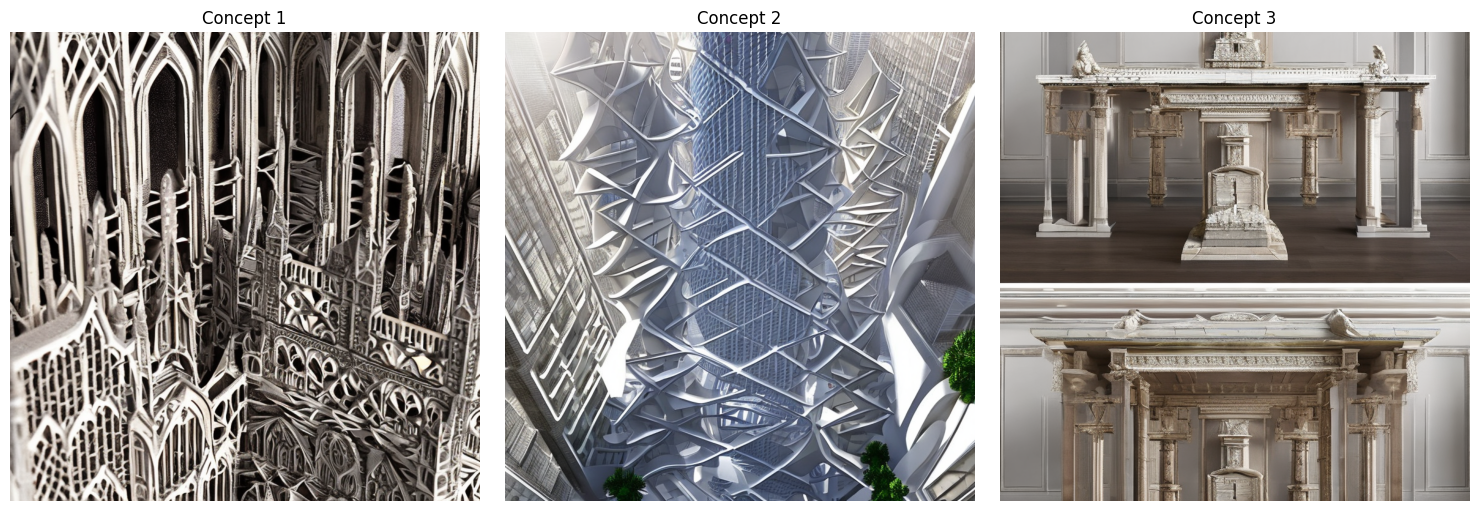

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def display_generated_images(image_paths):
    """
    Display generated images in a grid layout.

    Args:
        image_paths (list): List of paths to PNG images
    """
    # Determine grid layout
    num_images = len(image_paths)
    rows = (num_images + 2) // 3  # Ceiling division to create rows
    cols = min(num_images, 3)

    # Create figure and subplots
    plt.figure(figsize=(15, 5 * rows))

    for i, img_path in enumerate(image_paths, 1):
        plt.subplot(rows, cols, i)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f'Concept {i}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Usage
display_generated_images(generated_images)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Theme-Based Image Generator
Enter a theme prompt (or press Enter to finish): A studyroom with beautiful lights
Enter a theme prompt (or press Enter to finish): 


  0%|          | 0/50 [00:00<?, ?it/s]

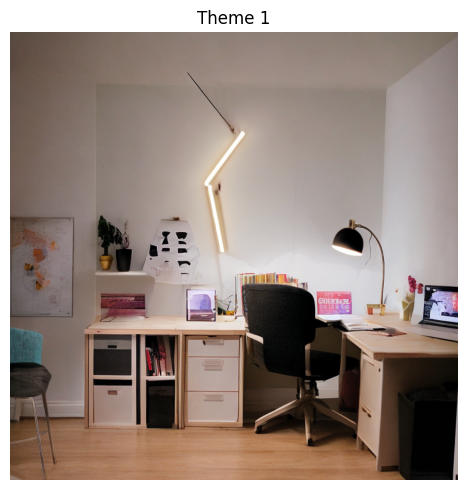

In [20]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

class InteractiveThemeGenerator:
    def __init__(self, model_name="stabilityai/stable-diffusion-2"):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.pipeline = StableDiffusionPipeline.from_pretrained(model_name)
        self.pipeline = self.pipeline.to(self.device)
        self.generated_images = []

    def generate_images(self, prompts, output_dir="generated_themes"):
        os.makedirs(output_dir, exist_ok=True)
        self.generated_images = []

        for i, prompt in enumerate(prompts, 1):
            image = self.pipeline(prompt).images[0]
            output_path = os.path.join(output_dir, f"theme_{i}.png")
            image.save(output_path)
            self.generated_images.append(output_path)

        return self.generated_images

    def display_images(self):
        plt.figure(figsize=(15, 5))
        for i, img_path in enumerate(self.generated_images, 1):
            plt.subplot(1, len(self.generated_images), i)
            img = mpimg.imread(img_path)
            plt.imshow(img)
            plt.title(f'Theme {i}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()

# Interactive usage
generator = InteractiveThemeGenerator()

def input_themes():
    themes = []
    while True:
        theme = input("Enter a theme prompt (or press Enter to finish): ")
        if not theme:
            break
        themes.append(theme)
    return themes

# Main interaction
print("Theme-Based Image Generator")
themes = input_themes()
if themes:
    generator.generate_images(themes)
    generator.display_images()
else:
    print("No themes entered.")

Theme-Based Image Generator
Enter a theme prompt (or press Enter to finish): a minimalist kitchen
Enter a theme prompt (or press Enter to finish): 


  0%|          | 0/50 [00:00<?, ?it/s]

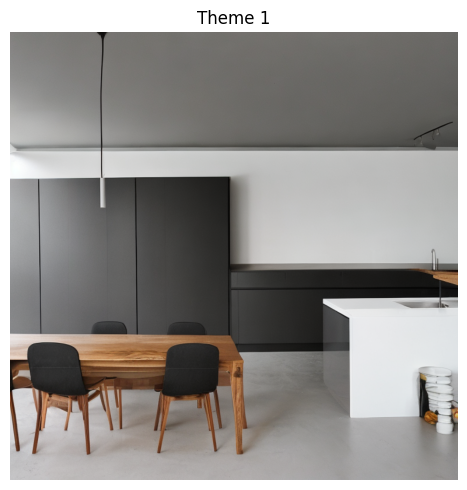

In [23]:
print("Theme-Based Image Generator")
themes = input_themes()
if themes:
    generator.generate_images(themes)
    generator.display_images()
else:
    print("No themes entered.")